# Decision Trees

BUSMGT 7247

## Load libraries and data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from matplotlib import pyplot as plt
from dtreeviz.trees import dtreeviz

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

### Data Description

The Bureau of Labor Statistics administers a National Longitudinal Survey of Youth that tracks individuals over the course of their lives.

The 1979 (NLSY79) cohort includes men and women born in the USA between 1957 and 1964.

In the data set, each row represents an individual that participates in the 1979 cohort.

| Attribute      | Definition                                                                                   |
| -------------- | -------------------------------------------------------------------------------------------- |
| ID             | Participant identifier assigned by BLS                                                       |
| Earnings       | Annual wage earnings 2014                                                                    |
| WeeksWorked    | Count of weeks worked in 2014                                                                |
| CumWeeksWorked | Cumulative weeks of work experience during study                                             |
| Education      | Years of education as of 2014                                                                |
| IQ             | Percentile on IQ test taken in 1979                                                          |
| Gender         | Participant's gender                                                                         |
| MSA            | Did the participant reside within an urban cluster or urbanized area in 2014?                |
| Library        | Did the participant, or someone in the participant's household, have a library card in 1979? |
| Esteem         | Score on the Rosenberg Self-Esteem Scale in 1979                                             |


In [2]:
df = pd.read_csv('data/nlsy.csv')
df.head()

,ID,Earnings,WeeksWorked,CumWeeksWorked,Education,IQ,Gender,MSA,Library,Esteem
0,83,0,3,553.0,10,2,Male,Yes,Yes,18
1,84,0,3,107.0,12,9,Male,Yes,Yes,20
2,87,11500,5,759.0,12,5,Male,Yes,Yes,22
3,105,20501,11,979.0,12,84,Female,Yes,Yes,19
4,178,59000,46,1010.0,16,99,Male,No,Yes,24


In [3]:
df.describe()

,ID,Earnings,WeeksWorked,CumWeeksWorked,Education,IQ,Esteem
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000
mean,4703.199497,24135.476111,37.160101,758.181894,13.135792,48.652976,22.242246
std,3103.388264,17758.127806,19.787004,245.824519,2.012128,30.266633,3.971056
min,83.000000,0.000000,0.000000,0.000000,7.000000,1.000000,12.000000
25%,2210.000000,11300.000000,21.000000,641.000000,12.000000,21.000000,19.000000
50%,4068.000000,21500.000000,51.000000,822.000000,12.000000,48.000000,22.000000
75%,6885.000000,35000.000000,52.000000,941.000000,14.000000,75.000000,25.000000
max,12303.000000,88000.000000,52.000000,1079.000000,20.000000,99.000000,30.000000


array([[<AxesSubplot:title={'center':'Earnings'}>]], dtype=object)

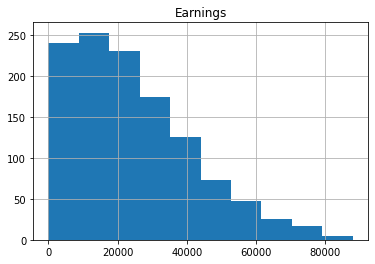

In [4]:
df.hist('Earnings')

## Classification Tree: Education

In [5]:
# Return index of education category as a function of years of education
def education_category(years_education):
    if years_education < 16:
        return 'High School'
    elif years_education == 16:
        return 'Undergraduate'
    else:
        return 'Graduate'

    
# Create a variable to contain each participant's education category    
df['EducationCategory'] = df['Education'].apply(education_category)
df['EducationCategory'].value_counts(normalize=True)

High School      0.830679
Undergraduate    0.113160
Graduate         0.056161
Name: EducationCategory, dtype: float64

In [6]:
# Classify education category based on earnings and weeks worked
feature_names = ['Earnings', 'WeeksWorked']
X = df[feature_names]

y = df['EducationCategory']
class_names = sorted(y.unique())

# Note the representation of the labels
print(y)

0         High School
1         High School
2         High School
3         High School
4       Undergraduate
            ...      
1188      High School
1189      High School
1190      High School
1191      High School
1192      High School
Name: EducationCategory, Length: 1193, dtype: object


In [7]:
# At this point, we omit train-test splits and cross-validation for simplicity
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=random_state)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1000)

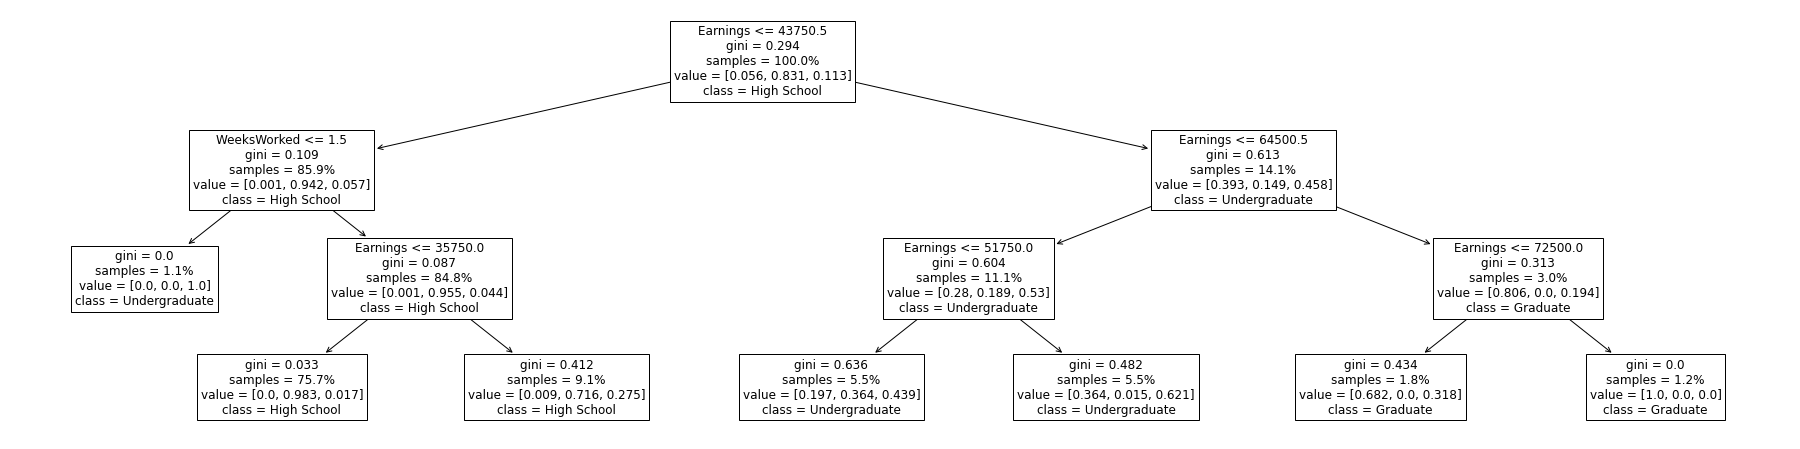

In [8]:
# Use a visual representation to depict the decision tree

# Please see HOML page 175 for an example of how to visualize decision trees
# for older versions of scikit-learn
fig = plt.figure(figsize=(32, 8))
tree.plot_tree(tree_clf, proportion=True,
               feature_names=feature_names, class_names=class_names,
               fontsize=12)
plt.show()

# Matplotlib makes it easy to export images
# fig.savefig('tree.png')

In [9]:
# The dtreeviz package outputs nicer graphical representations,
# but requires us to convert labels to a numerical representation
label_encoder = LabelEncoder()
y_num = label_encoder.fit_transform(y)

tree_clf_num = DecisionTreeClassifier(max_depth=3)
tree_clf_num.fit(X, y_num)

# Now, the labels have numeric codes
y_num

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
# Output the label names
label_encoder.classes_

array(['Graduate', 'High School', 'Undergraduate'], dtype=object)

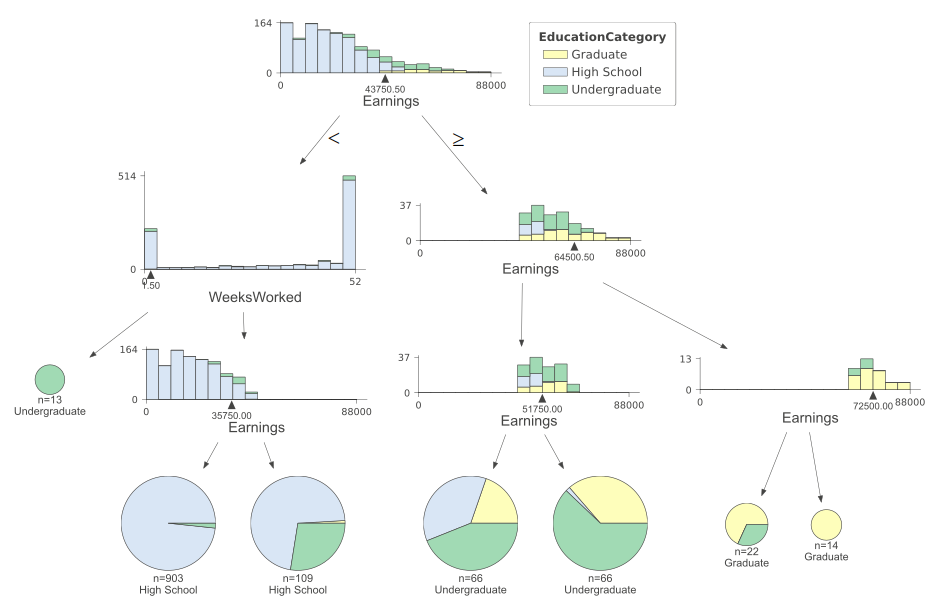

In [11]:
# Using the dtreeviz package to visualize
viz = dtreeviz(tree_clf_num, X, y_num, target_name='EducationCategory',
         feature_names=feature_names,
         class_names=list(label_encoder.classes_),
         scale=1.6)  # Scale adjusts size of the output image, not the algorithm

viz

In [12]:
# Or, use a text representation to depict the decision tree
print(tree.export_text(tree_clf, feature_names=feature_names))

|--- Earnings <= 43750.50
|   |--- WeeksWorked <= 1.50
|   |   |--- class: Undergraduate
|   |--- WeeksWorked >  1.50
|   |   |--- Earnings <= 35750.00
|   |   |   |--- class: High School
|   |   |--- Earnings >  35750.00
|   |   |   |--- class: High School
|--- Earnings >  43750.50
|   |--- Earnings <= 64500.50
|   |   |--- Earnings <= 51750.00
|   |   |   |--- class: Undergraduate
|   |   |--- Earnings >  51750.00
|   |   |   |--- class: Undergraduate
|   |--- Earnings >  64500.50
|   |   |--- Earnings <= 72500.00
|   |   |   |--- class: Graduate
|   |   |--- Earnings >  72500.00
|   |   |   |--- class: Graduate



In [13]:
# Print class names for reference
print(class_names)

# Predict probabilities for a new instance:
# Earnings 50,000 and WeeksWorked 52
tree_clf.predict_proba([[50000, 52]])

['Graduate', 'High School', 'Undergraduate']


array([[0.1969697 , 0.36363636, 0.43939394]])

In [14]:
# Predict probabilities for a new instance:
tree_clf.predict_proba([[60000, 52]])

array([[0.36363636, 0.01515152, 0.62121212]])

### Exercise 

Add a variable to the classifier and visualize the resulting decision tree.

### Cross-Validation of Maximum Depth

In [15]:
# Split data into training and testing sets
(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y, test_size=0.25,
                                     stratify=y, random_state=random_state)

In [16]:
depths = list(range(1, 100))
runs = []

for d in depths:
    curr_tree_clf = DecisionTreeClassifier(max_depth=d,
                                           random_state=random_state)
    runs += [cross_validate(curr_tree_clf, X_train, y_train,                            
                            cv=5, scoring='accuracy')]

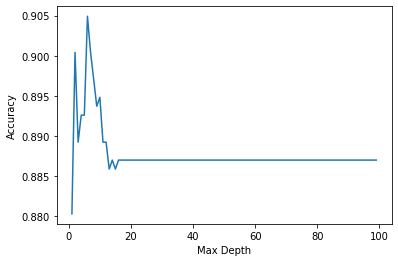

In [17]:
accuracies = [r['test_score'].mean() for r in runs]
plt.plot(depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [18]:
max(accuracies)

0.9049212227732095

In [19]:
# What is the best depth according to cross-validation?
d_best = depths[np.argmax(accuracies)]
d_best

6

In [20]:
# Fit a classifier with the cross-validated depth and output a confusion matrix
val_tree_clf = DecisionTreeClassifier(max_depth=d_best)
val_tree_clf.fit(X_train, y_train)
y_pred = val_tree_clf.predict(X_test)

# Note: the first row in the output tallies the predicted classes
# for instances of the first actual class
print(class_names)
confusion_matrix(y_test, y_pred)

['Graduate', 'High School', 'Undergraduate']


array([[  7,   2,   8],
       [  0, 243,   5],
       [  3,  12,  19]])

### Exercise
Use cross-validation to search for the best value of min_samples_split while keeping depth fixed at d_best.

## Regression Tree: Earnings

In [21]:
# Regress earnings based on education, weeks worked,
# and work experience (CumWeeksWorked)
feature_names = ['Education', 'WeeksWorked', 'CumWeeksWorked']
Xreg = df[feature_names]
yreg = df['Earnings']

In [22]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=random_state)
tree_reg.fit(Xreg, yreg)

DecisionTreeRegressor(max_depth=3, random_state=1000)

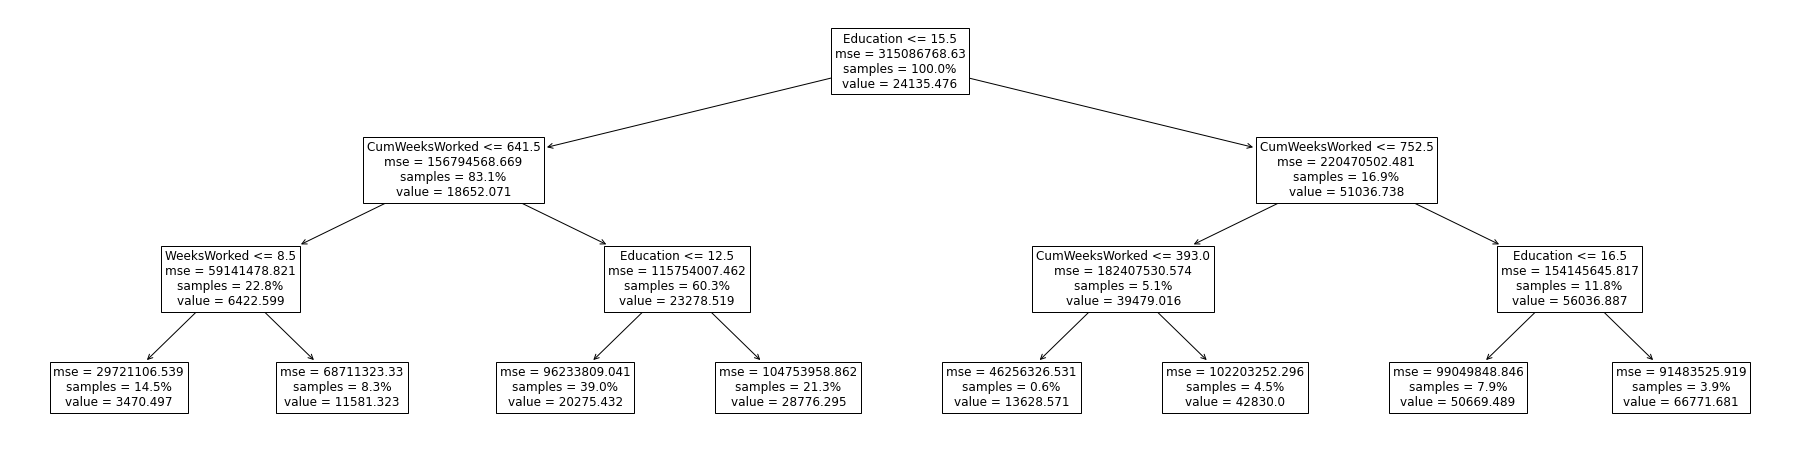

In [23]:
fig = plt.figure(figsize=(32, 8))
tree.plot_tree(tree_reg, proportion=True, feature_names=feature_names,
               fontsize=12)
plt.show()

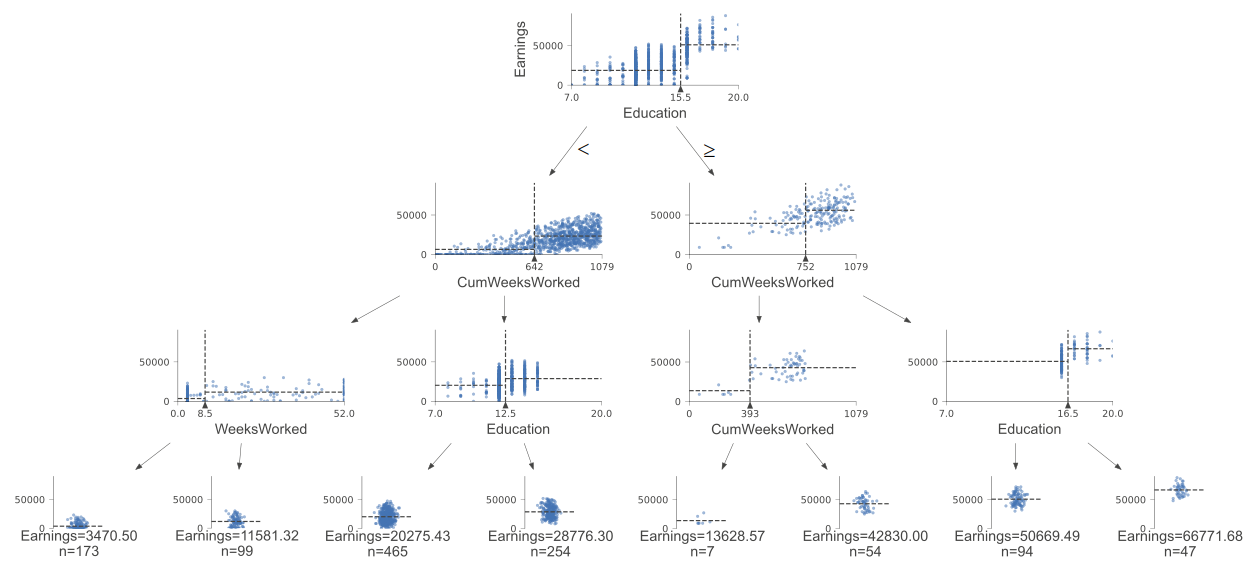

In [24]:
# Using the dtreeviz package to visualize
viz = dtreeviz(tree_reg, Xreg, yreg, target_name='Earnings',
               feature_names=feature_names,
               scale=1.6)  # Scale adjusts size of the output image, not the algorithm

viz